#  Prototype Model for Early Disease Risk Prediction :

In [1]:
!pip install shap

  Using cached shap-0.48.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.48.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (997 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [shap]━━━━━━ 1/2 [shap]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import shap
import joblib

/home/uma/anaconda3/envs/tfod/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading dataset :

In [3]:
dataset=pd.read_csv("/home/uma/PIMA_diabetes_dataset/diabetes.csv")

### Exploring dataset : 

In [4]:
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
print(dataset.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
print(dataset.value_counts())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [7]:
print(dataset.info)

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [8]:
dataset[dataset["BMI"].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [9]:
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

### Data preprocessing : 

In [10]:
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
# No null values 

### Separating features and target variables : 

In [12]:
X=dataset.drop("Outcome",axis=1)
Y=dataset["Outcome"]

### Standarizing features : 

In [13]:
!pip install scikit-learn

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

### Splitting train and test data :

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
X_train.shape

(614, 8)

In [18]:
X_test.shape

(154, 8)

In [19]:
Y_train.shape

(614,)

In [20]:
Y_test.shape

(154,)

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
best_acc=0
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    results[name] = acc
    print(f"✅ {name} Accuracy: {acc:.4f}")
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    print("-" * 50)
    # Check and store best model
    if acc > best_acc:
        best_acc = acc
        best_model = model
        best_model_name = name



✅ Logistic Regression Accuracy: 0.7532
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

--------------------------------------------------
✅ Random Forest Accuracy: 0.7273
[[78 21]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

--------------------------------------------------
✅ Gradient Boosting Accuracy: 0.7403
[[77 22]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81

/home/uma/anaconda3/envs/tfod/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:36:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Accuracy: 0.7078
[[73 26]
 [19 36]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

--------------------------------------------------


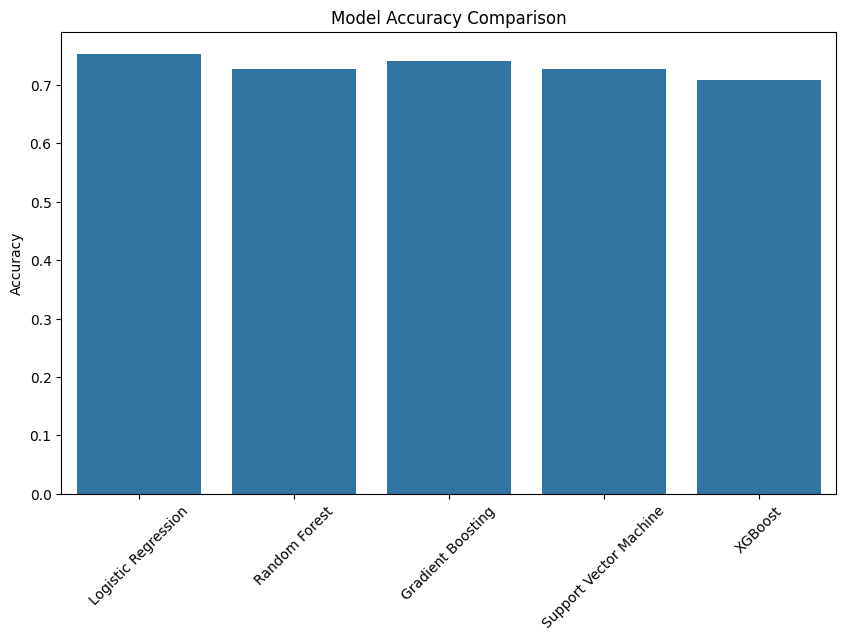

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


### Saving best model : 

In [23]:
joblib.dump(best_model, "best_model.pkl")
print(f"\n Best Model: {best_model_name} (Accuracy: {best_acc:.4f}) saved as 'best_model.pkl'")


 Best Model: Logistic Regression (Accuracy: 0.7532) saved as 'best_model.pkl'


In [24]:
!pip install shap --quiet

In [25]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

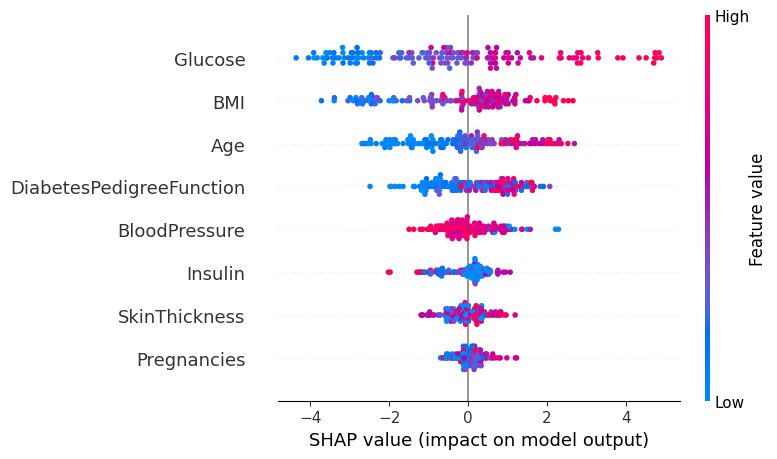

In [27]:
import shap

# Example with XGBoost
explainer = shap.Explainer(models["XGBoost"])
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=cols)


In [ ]:
import streamlit as st
import numpy as np
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.title("🧠 Disease Risk Prediction")
st.markdown("Enter the details below to predict the risk of a disease (e.g., diabetes)")

# Input fields
pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=1)
glucose = st.number_input("Glucose Level", min_value=0, max_value=200, value=100)
blood_pressure = st.number_input("Blood Pressure", min_value=0, max_value=150, value=70)
skin_thickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
insulin = st.number_input("Insulin", min_value=0, max_value=900, value=80)
bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0)
dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=2.5, value=0.5)
age = st.number_input("Age", min_value=10, max_value=100, value=30)

# Predict button
if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                            insulin, bmi, dpf, age]])
    prediction = model.predict(input_data)[0]

    if prediction == 1:
        st.error("🔴 High Risk Detected")
    else:
        st.success("🟢 Low Risk Detected")


In [29]:
import gradio as gr
import numpy as np
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

# Define the prediction function
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness,
                     insulin, bmi, dpf, age):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                            insulin, bmi, dpf, age]])
    prediction = model.predict(input_data)[0]
    return "🔴 Diabetic" if prediction == 1 else "🟢 Not Diabetic"

# Gradio UI components
interface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Pregnancies", value=0),
        gr.Number(label="Glucose", value=120),
        gr.Number(label="Blood Pressure", value=70),
        gr.Number(label="Skin Thickness", value=20),
        gr.Number(label="Insulin", value=80),
        gr.Number(label="BMI", value=25.0),
        gr.Number(label="Diabetes Pedigree Function", value=0.5),
        gr.Number(label="Age", value=30)
    ],
    outputs=gr.Text(label="Prediction"),
    title="🧪 Diabetes Prediction System",
    description="Enter patient details to predict diabetes using a trained machine learning model."
)

interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
